In [13]:
import pandas as pd#importing pandas
import pandas as pd#adding/updating dataframe
import numpy as np#matchematical 
import matplotlib.pyplot as plt#visiualization
from scipy import stats
import tensorflow as tf# for deep learning
import seaborn as sns
from pylab import rcParams
from sklearn import metrics
from sklearn.model_selection import train_test_split
%matplotlib inline
import sklearn # tool for machine learning
from sklearn import metrics
# import metrics we'll need
from sklearn.metrics import accuracy_score  
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import sklearn.cross_validation
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

loading the csv

In [3]:
df = pd.read_csv('C:\\Users\\Ashish2448311\
\Anaconda3\\envs\\tensorflow\\lib\\site-packages\\dataset.csv')

In [3]:
df.head()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


In [4]:
df.dtypes #printing data type of all the features 

date               object
time               object
username           object
wrist               int64
activity            int64
acceleration_x    float64
acceleration_y    float64
acceleration_z    float64
gyro_x            float64
gyro_y            float64
gyro_z            float64
dtype: object

In [5]:
print('df has ' +  str(df.shape[0]) + ' observations ' + ' and ' + str(df.shape[1]) + ' columns ')

df has 88588 observations  and 11 columns 


In [6]:
df.describe()# gives discription of all the variables

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
count,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000
mean,0.522170,0.500801,-0.074811,-0.562585,-0.313956,0.004160,0.037203,0.022327
std,0.499511,0.500002,1.009299,0.658458,0.486815,1.253423,1.198725,1.914423
min,0.000000,0.000000,-5.350500,-3.299000,-3.753800,-4.430600,-7.464700,-9.480000
25%,0.000000,0.000000,-0.381800,-1.033500,-0.376000,-0.920700,-0.644825,-1.345125
50%,1.000000,1.000000,-0.059500,-0.759100,-0.221000,0.018700,0.039300,0.006900
75%,1.000000,1.000000,0.355500,-0.241775,-0.085900,0.888800,0.733700,1.398200
max,1.000000,1.000000,5.603300,2.668000,1.640300,4.874200,8.498000,11.266200


check count of nan values


In [7]:
df.isnull().sum()

date              0
time              0
username          0
wrist             0
activity          0
acceleration_x    0
acceleration_y    0
acceleration_z    0
gyro_x            0
gyro_y            0
gyro_z            0
dtype: int64

there are no nan values 


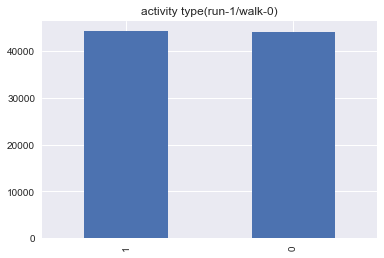

In [8]:
pd.value_counts(df['activity']).plot(kind='bar', title='activity type(run-1/walk-0)');#shows bar plot of run ad walk 

0 is walk and 1 is run here we can see that the count of both run and walk is nearly equal so there is no need of sampling

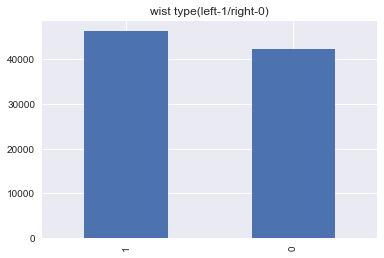

In [9]:
pd.value_counts(df['wrist']).plot(kind='bar', title='wist type(left-1/right-0)')

0 is left and 1 is right here we can see that the count of both left and right wrist  is slightly larger but that is not an issue so there is no need of sampling

In [10]:
walk =df[df['activity']==0]

In [11]:
print('the walk has '+ str(walk.shape[0]) +  ' values ' + ' in that ' + str(pd.value_counts(walk['wrist'])[0]) + ' left wrist and ' + 
                                                                           str(pd.value_counts(walk['wrist'])[1]) + ' right wrist ')

the walk has 44223 values  in that 18622 left wrist and 25601 right wrist 


In [12]:
run =df[df['activity']==1]

In [13]:
print('the run has '+ str(run.shape[0]) +  ' values ' + ' in that ' + str(pd.value_counts(run['wrist'])[0]) + ' left wrist and ' + 
                                                                           str(pd.value_counts(run['wrist'])[1]) + ' right wrist ')

the run has 44365 values  in that 23708 left wrist and 20657 right wrist 


In [14]:
SENSOR_DATA_COLUMNS = ['acceleration_x', 'acceleration_y', 'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z']
# get dataframe with 'left' wrist only
df_left_wrist_data = pd.DataFrame()
df_left_wrist_data = df[df.wrist == 0]

# get dataframe with 'right' wrist only
df_right_wrist_data = pd.DataFrame()
df_right_wrist_data = df[df.wrist == 1]

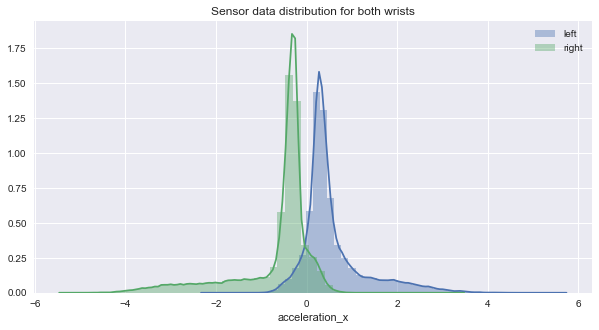

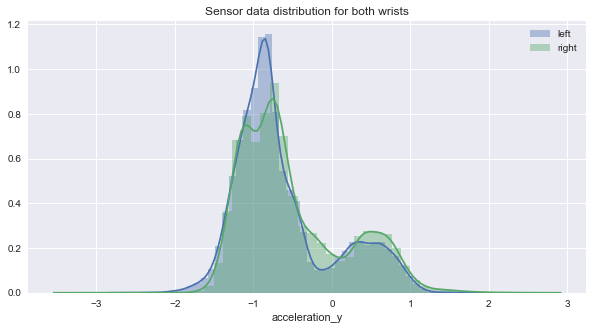

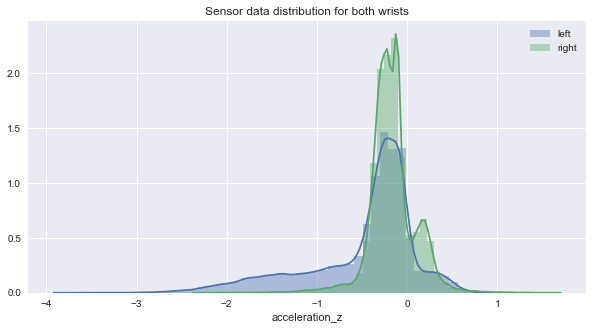

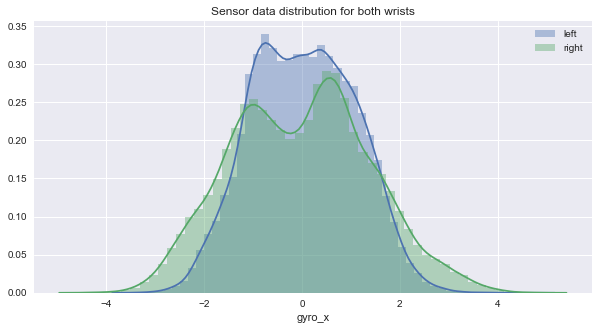

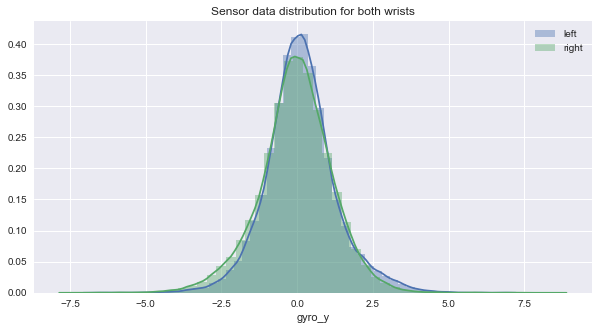

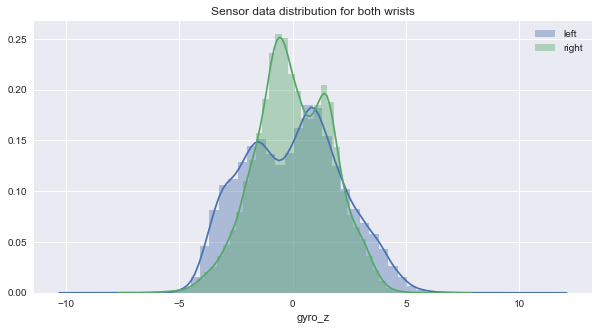

In [15]:
for c in SENSOR_DATA_COLUMNS:
    plt.figure(figsize=(10,5))
    plt.title("Sensor data distribution for both wrists")
    sns.distplot(df_left_wrist_data[c], label='left')
    sns.distplot(df_right_wrist_data[c], label='right')
    plt.legend()
    plt.show# plots the distribution of all the columns of both left and wright wrist
    

Machine learning approach

In [4]:
X=df[['acceleration_x', 'acceleration_y', 'acceleration_z','gyro_x','gyro_y','gyro_z']]#remove username , date, time and wrist column

In [17]:
X.shape

(88588, 6)

In [18]:
X.head()

,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


In [5]:

y = pd.factorize(df['activity'])[0] #perform one hot encoding u

pca

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
y2 = scaler.fit_transform(X) #tranform into vecor
y = pd.factorize(df['activity'])[0]

In [21]:
y2.shape

(88588, 6)

In [22]:
from sklearn.decomposition import PCA

In [23]:
clf= PCA(.99)   
X_trans = clf.fit_transform(y2)
print('VARIANCE REATINED:',clf.n_components)
#rint(y2.shape)
print('SHAPE AFTER PCA:', X_trans.shape) #GIVES US THE SHAPE AFTER PCA

VARIANCE REATINED: 0.99
SHAPE AFTER PCA: (88588, 6)


no use of pca in this data since it gives all the components

splitting of data

In [6]:
Xtrain, Xtest, ytrain, ytest = sklearn.cross_validation.train_test_split(X, y, test_size = 0.3)#splitting of data into training and testing with 30%test size

KNN

In [17]:
from sklearn.neighbors import KNeighborsClassifier

# instantiate the estimator
knn = KNeighborsClassifier(  )

# fit the model
knn.fit(Xtrain, ytrain)

# predict the response
y_pred = knn.predict(Xtest)

# accuracy score
pred_knn = metrics.accuracy_score(ytest, y_pred)
print ("test Accuracy for KNN: {}".format(pred_knn))

knn= pred_knn
print(confusion_matrix(ytest, y_pred))
precisionknn = precision_score(ytest, y_pred)
recallknn = recall_score(ytest, y_pred)
print( 'precision = ', precisionknn, '\n', 'recall = ', recallknn)


test Accuracy for KNN: 0.9844602475824962
[[13198    90]
 [  323 12966]]
precision =  0.993106617647 
 recall =  0.975694183159


logistic regression

In [18]:
from sklearn.linear_model import LogisticRegression

# instantiate the estimator
log = LogisticRegression()

# fit the model
log.fit(Xtrain, ytrain)

# predict the response
y_pred = log.predict(Xtest)

# accuracy score
pred_logreg = metrics.accuracy_score(ytest, y_pred)
c=confusion_matrix(ytest, y_pred)
c

print ("Accuracy for Logistic Regression: {}".format(pred_logreg))
lg = pred_logreg
print(confusion_matrix(ytest, y_pred))
precisionlg = precision_score(ytest, y_pred)
recalllg = recall_score(ytest, y_pred)
print( 'precision = ', precisionlg, '\n', 'recall = ', recalllg)




Accuracy for Logistic Regression: 0.851036610603153
[[11873  1415]
 [ 2544 10745]]
precision =  0.883634868421 
 recall =  0.80856347355


support vector machine

In [27]:
x=X[:20000]
Y=y[:20000]
xtrain, xtest, Ytrain, Ytest = sklearn.cross_validation.train_test_split(x, Y, test_size = 0.3)


In [28]:
parameter_candidates = [
  {'C': [0.01,0.1,1,10], 'kernel': ['linear']},
  {'C': [0.01,0.1,1,10], 'gamma': [0.01,0.001], 'kernel': ['rbf']},
]
# Create a classifier object with the classifier and parameter candidates
clf = GridSearchCV(estimator=svm.SVC(), param_grid=parameter_candidates, n_jobs=-1)

# Train the classifier on data1's feature and target data
clf.fit(xtrain,Ytrain)   

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid=[{'kernel': ['linear'], 'C': [0.01, 0.1, 1, 10]}, {'kernel': ['rbf'], 'gamma': [0.01, 0.001], 'C': [0.01, 0.1, 1, 10]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [29]:
# View the best parameters for the model found using grid search
print('Best C:',clf.best_estimator_.C)
print('Best Kernel:',clf.best_estimator_.kernel)
print('Best Gamma:',clf.best_estimator_.gamma)

Best C: 10
Best Kernel: rbf
Best Gamma: 0.01


In [28]:
from sklearn.svm import SVC

# instantiate the estimator
svm = SVC(kernel='rbf', gamma=0.01,C=10.0)

# fit the model
svm.fit(Xtrain,ytrain)

# predict the response
y_pred = svm.predict(Xtest)

# accuracy score
pred_sv = metrics.accuracy_score(ytest, y_pred)
print ("Accuracy for SVM: {}".format(pred_sv))
svm = pred_sv



Accuracy for SVM: 0.9698611581442601


In [15]:
print(confusion_matrix(ytest, y_pred))
precisionsvm = precision_score(ytest, y_pred)
recallsvm = recall_score(ytest, y_pred)
print( 'precision = ', precisionsvm, '\n', 'recall = ', recallsvm)


[[13054   234]
 [  567 12722]]
precision =  0.981938870022 
 recall =  0.957333132666


Random forest

In [21]:
# import the model
from sklearn.ensemble import RandomForestClassifier

# instantiate the estimator
rf = RandomForestClassifier()

# fit the model
rf.fit(Xtrain, ytrain)

# predict the response
y_pred = rf.predict(Xtest)

# accuracy score
pred_rf = metrics.accuracy_score(ytest, y_pred)
print ("Accuracy for Random Forest {}".format(pred_rf))
rf=pred_rf
print(confusion_matrix(ytest, y_pred))
precisionrf = precision_score(ytest, y_pred)
recallrf = recall_score(ytest, y_pred)
print( 'precision = ', precisionrf, '\n', 'recall = ', recallrf)


Accuracy for Random Forest 0.9883357790570795
[[13171   117]
 [  193 13096]]
precision =  0.991145084387 
 recall =  0.985476710061


naive bayes

In [33]:
from sklearn.naive_bayes import GaussianNB

# instantiate the estimator
nb = GaussianNB()

# fit the model
nb.fit(Xtrain, ytrain)

# predict the response
y_pred = nb.predict(Xtest)

# accuracy score
pred_nb = metrics.accuracy_score(ytest, y_pred)
print ("Accuracy for Gaussian Naive Bayes: {}".format(pred_nb))
gnb1 = pred_nb
confusion_matrix(ytest, y_pred)

Accuracy for Gaussian Naive Bayes: 0.9571810211837303


array([[13156,   102],
       [ 1036, 12283]])

In [ ]:
print( classification_report(ytest,pred_nb))

LSTM APPROACH

In [34]:
def plot_activity(activity, df):
    data = df[df['activity'] == activity][['acceleration_x', 'acceleration_y', 'acceleration_z','gyro_x','gyro_y','gyro_z']][:150]
    axis = data.plot(subplots=True, figsize=(16, 12), 
                     title=activity)
    for ax in axis:
        ax.legend(loc='lower left', bbox_to_anchor=(1.0, 0.5))# this function plots the activity of running and walking

walking

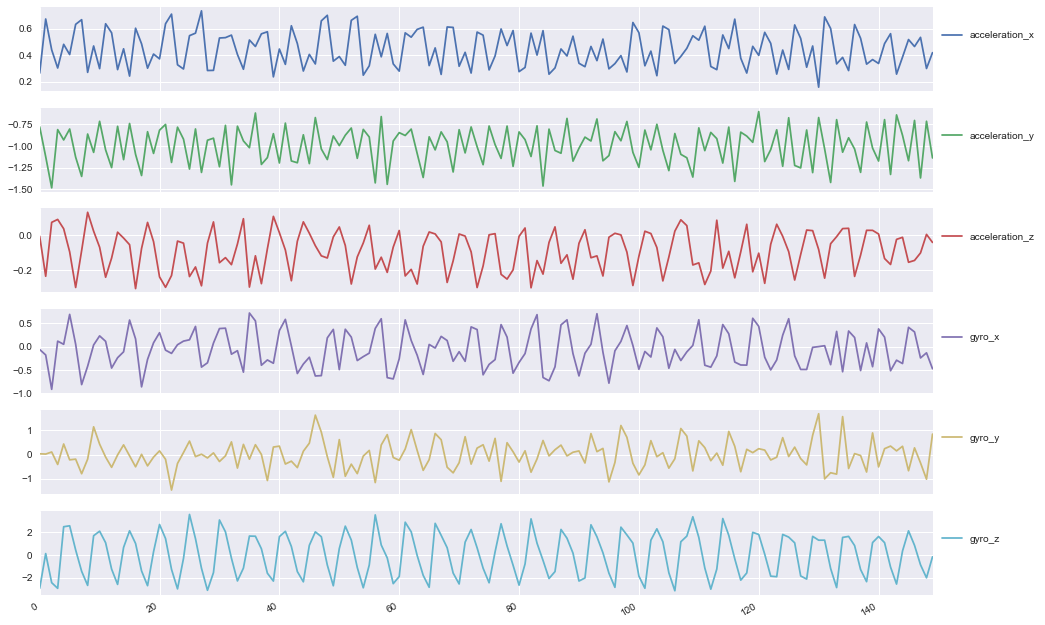

In [35]:
plot_activity(0, df)

running

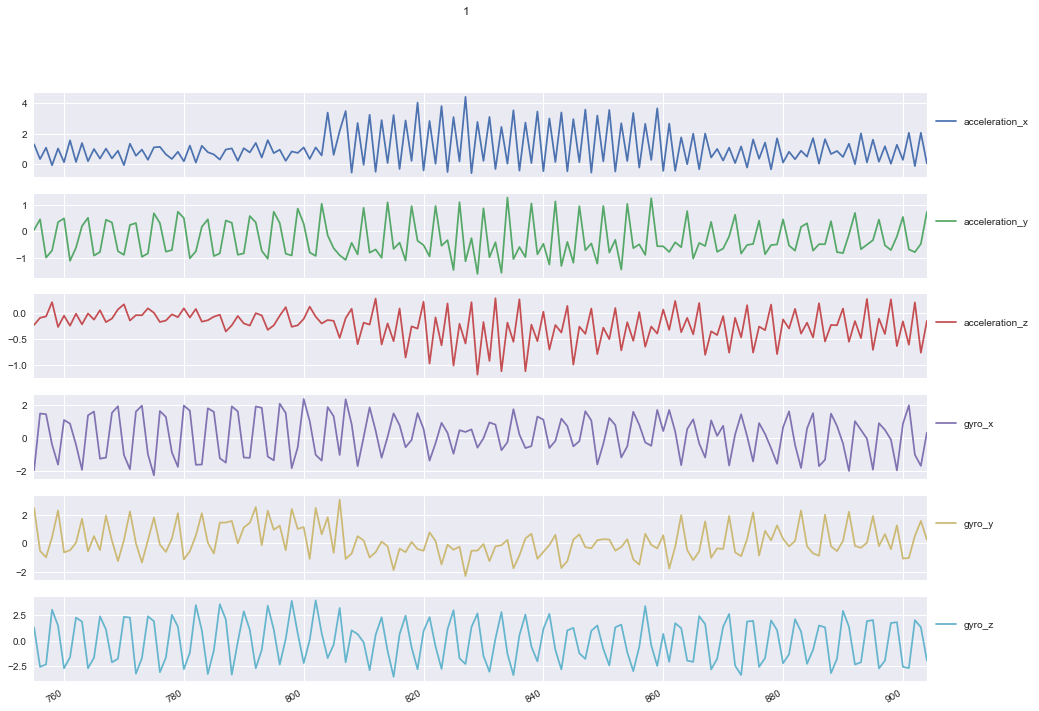

In [36]:
plot_activity(1, df)

Data preprocessing

In [37]:
N_TIME_STEPS = 200 # each generation of sequence contains 200 training examples with step 20
N_FEATURES = 6
step = 20
segments = []
labels = []
for i in range(0, len(df) - N_TIME_STEPS, step):
    qs = df['acceleration_x'].values[i: i + N_TIME_STEPS]
    bs = df['acceleration_y'].values[i: i + N_TIME_STEPS]
    cs = df['acceleration_z'].values[i: i + N_TIME_STEPS]
    ds = df['gyro_x'].values[i: i + N_TIME_STEPS]
    es = df['gyro_y'].values[i: i + N_TIME_STEPS]
    fs = df['gyro_z'].values[i: i + N_TIME_STEPS]
    
    label = stats.mode(df['activity'][i: i + N_TIME_STEPS])[0][0]
    segments.append([qs, bs, cs,ds,es,fs])
    labels.append(label)

In [38]:
X.shape#shape of original features

(88588, 6)

In [39]:
np.array(segments).shape # transformed shape 

(4420, 6, 200)

In [40]:
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42

In [41]:
#transforming it into sequences of 200 rows
reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, N_TIME_STEPS, N_FEATURES)
labels = np.asarray(pd.get_dummies(labels), dtype = np.float32)#one hot encoding

In [42]:
reshaped_segments.shape

(4420, 200, 6)

In [43]:
labels[0]


array([ 1.,  0.], dtype=float32)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(
        reshaped_segments, labels, test_size=0.2, random_state=RANDOM_SEED)#split the data into training and test (20%) set

modelling LSTM

In [45]:
N_CLASSES = 2
N_HIDDEN_UNITS = 64


In [46]:
#creating place holders
tf.reset_default_graph()

X = tf.placeholder(tf.float32, [None, N_TIME_STEPS, N_FEATURES], name="input")
Y = tf.placeholder(tf.float32, [None, N_CLASSES])

In [47]:
#model contains 2 fully-connected and 2 LSTM layers (stacked on each other) with 64 units each
def create_LSTM_model(inputs):
    W = {
        'hidden': tf.Variable(tf.random_normal([N_FEATURES, N_HIDDEN_UNITS])),
        'output': tf.Variable(tf.random_normal([N_HIDDEN_UNITS, N_CLASSES]))
    }
    biases = {
        'hidden': tf.Variable(tf.random_normal([N_HIDDEN_UNITS], mean=1.0)),
        'output': tf.Variable(tf.random_normal([N_CLASSES]))
    }
    
    X = tf.transpose(inputs, [1, 0, 2])
    X = tf.reshape(X, [-1, N_FEATURES])
    hidden = tf.nn.relu(tf.matmul(X, W['hidden']) + biases['hidden'])
    hidden = tf.split(hidden, N_TIME_STEPS, 0)

    # Stack 2 LSTM layers
    lstm_layers = [tf.contrib.rnn.BasicLSTMCell(N_HIDDEN_UNITS, forget_bias=1.0) for _ in range(2)]
    lstm_layers = tf.contrib.rnn.MultiRNNCell(lstm_layers)

    outputs, _ = tf.contrib.rnn.static_rnn(lstm_layers, hidden, dtype=tf.float32)

    # Get output for the last time step
    lstm_last_output = outputs[-1]

    return tf.matmul(lstm_last_output, W['output']) + biases['output']

In [48]:
#creating the model
pred_Y = create_LSTM_model(X)

pred_softmax = tf.nn.softmax(pred_Y, name="y_")

In [49]:
#use of L2 regularization and that must be noted in  loss 
L2_LOSS = 0.0015

l2 = L2_LOSS * \
    sum(tf.nn.l2_loss(tf_var) for tf_var in tf.trainable_variables())

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = pred_Y, labels = Y)) + l2

In [50]:
LEARNING_RATE = 0.0025
#defining the optimiser
optimizer = tf.train.AdamOptimizer(learning_rate=LEARNING_RATE).minimize(loss)

correct_pred = tf.equal(tf.argmax(pred_softmax, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, dtype=tf.float32))

Training with 40 epoch

In [59]:
N_EPOCHS = 60
BATCH_SIZE = 1024
saver = tf.train.Saver()

history = dict(train_loss=[], 
                     train_acc=[], 
                     test_loss=[], 
                     test_acc=[])

sess=tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

train_count = len(X_train)

for i in range(1, N_EPOCHS + 1):
    for start, end in zip(range(0, train_count, BATCH_SIZE),
                          range(BATCH_SIZE, train_count + 1,BATCH_SIZE)):
        sess.run(optimizer, feed_dict={X: X_train[start:end],
                                       Y: y_train[start:end]})

    _, acc_train, loss_train = sess.run([pred_softmax, accuracy, loss], feed_dict={
                                            X: X_train, Y: y_train})

    _, acc_test, loss_test = sess.run([pred_softmax, accuracy, loss], feed_dict={
                                            X: X_test, Y: y_test})

    history['train_loss'].append(loss_train)
    history['train_acc'].append(acc_train)
    history['test_loss'].append(loss_test)
    history['test_acc'].append(acc_test)

    if i != 1 and i % 10 != 0:
        continue
    print('epoch {0} has test accracy of {1} and loss of {2}'.format(i,acc_test,loss_test))
   
    
predictions, acc_final, loss_final = sess.run([pred_softmax, accuracy, loss], feed_dict={X: X_test, Y: y_test})

print()
print('final results: accuracy {0} and loss {1}'.format(acc_final,loss_final))

epoch 1 has test accracy of 0.9751130938529968 and loss of 0.8098827600479126
epoch 10 has test accracy of 0.9966063499450684 and loss of 0.6647708415985107
epoch 20 has test accracy of 0.9966063499450684 and loss of 0.5822730660438538
epoch 30 has test accracy of 0.9966063499450684 and loss of 0.5220971703529358
epoch 40 has test accracy of 0.9966063499450684 and loss of 0.4711863100528717
epoch 50 has test accracy of 0.9966063499450684 and loss of 0.4279460310935974
epoch 60 has test accracy of 0.9966063499450684 and loss of 0.3900631368160248

final results: accuracy 0.9966063499450684 and loss 0.3900631368160248


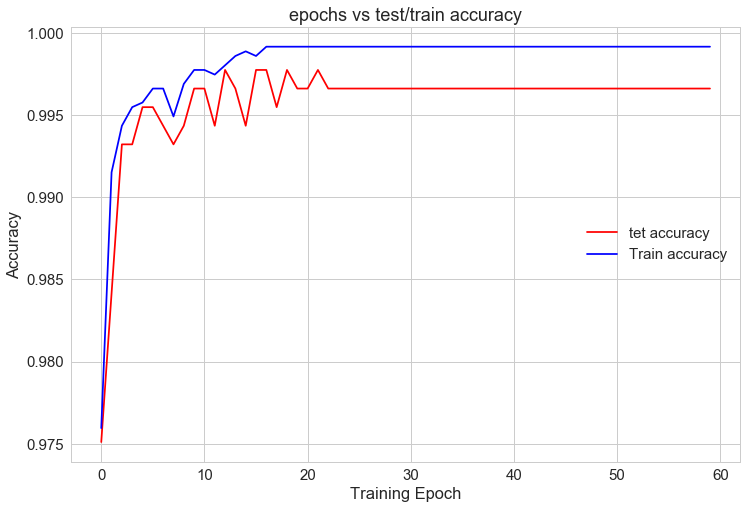

In [60]:
plt.figure(figsize=(12, 8))
plt.plot(np.array(history['test_acc']), "r", label="tet accuracy")
plt.plot(np.array(history['train_acc']), "b", label="Train accuracy")
plt.title("epochs vs test/train accuracy")
plt.legend(loc='right', shadow=False)
plt.ylabel('Accuracy')
plt.xlabel('Training Epoch')

The test accuracy is max for epoch==12

In [62]:
N_EPOCHS = 22
BATCH_SIZE = 1024
saver = tf.train.Saver()

history = dict(train_loss=[], 
                     train_acc=[], 
                     test_loss=[], 
                     test_acc=[])

sess=tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

train_count = len(X_train)

for i in range(1, N_EPOCHS + 1):
    for start, end in zip(range(0, train_count, BATCH_SIZE),
                          range(BATCH_SIZE, train_count + 1,BATCH_SIZE)):
        sess.run(optimizer, feed_dict={X: X_train[start:end],
                                       Y: y_train[start:end]})

    _, acc_train, loss_train = sess.run([pred_softmax, accuracy, loss], feed_dict={
                                            X: X_train, Y: y_train})

    _, acc_test, loss_test = sess.run([pred_softmax, accuracy, loss], feed_dict={
                                            X: X_test, Y: y_test})

    history['train_loss'].append(loss_train)
    history['train_acc'].append(acc_train)
    history['test_loss'].append(loss_test)
    history['test_acc'].append(acc_test)

    if i != 1 and i % 5 != 0:
        continue
    print('epoch {0} has test accracy {1} and loss test{2}'.format(i,acc_test,loss_test))
   
    #print('epoch ' str(i) ' has test accuracy: ' str(acc_test) ' loss: ' str(loss_test))
    
predictions, acc_final, loss_final = sess.run([pred_softmax, accuracy, loss], feed_dict={X: X_test, Y: y_test})

print()
print('final results: accuracy {0} and loss {1}'.format(acc_final,loss_final))

epoch 1 has test accracy 0.8925339579582214 and loss test1.0019768476486206
epoch 5 has test accracy 0.9875565767288208 and loss test0.7600255608558655
epoch 10 has test accracy 0.9932126402854919 and loss test0.6926394701004028
epoch 15 has test accracy 0.9954751133918762 and loss test0.6502702236175537
epoch 20 has test accracy 0.9977375268936157 and loss test0.6167940497398376

final results: accuracy 0.9988687634468079 and loss 0.6036503314971924


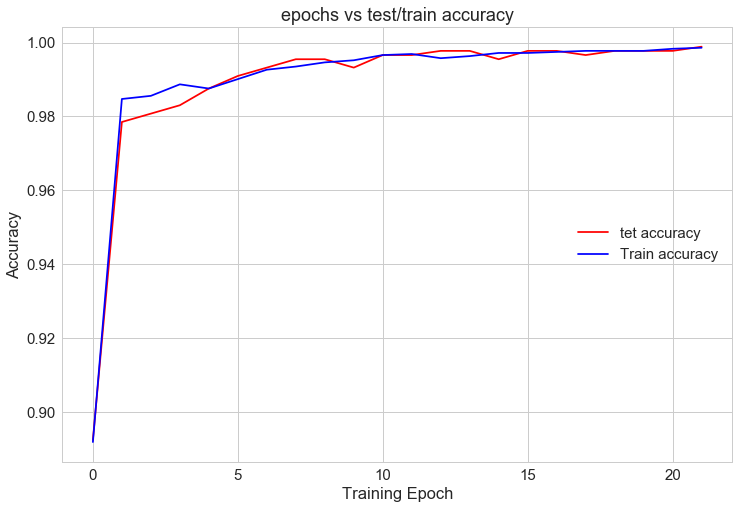

In [63]:
plt.figure(figsize=(12, 8))
plt.plot(np.array(history['test_acc']), "r", label="tet accuracy")
plt.plot(np.array(history['train_acc']), "b", label="Train accuracy")
plt.title("epochs vs test/train accuracy")
plt.legend(loc='right', shadow=False)
plt.ylabel('Accuracy')
plt.xlabel('Training Epoch')

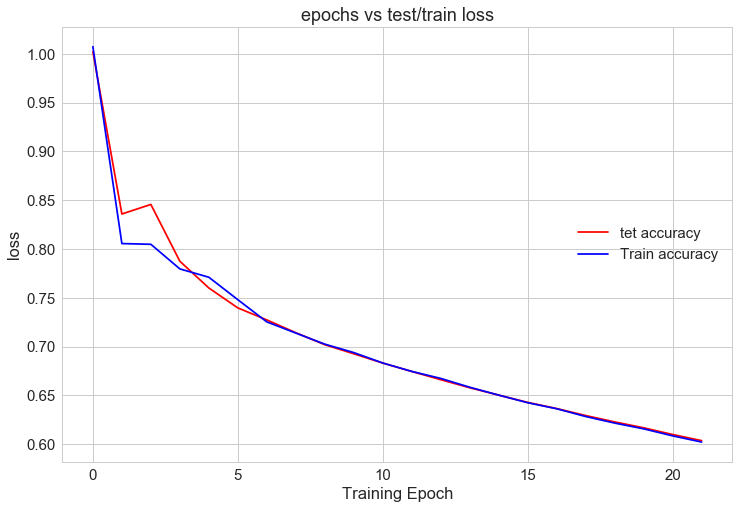

In [64]:
#plot of epoch vs loss
plt.figure(figsize=(12, 8))
plt.plot(np.array(history['test_loss']), "r", label="tet accuracy")
plt.plot(np.array(history['train_loss']), "b", label="Train accuracy")
plt.title("epochs vs test/train loss")
plt.legend(loc='right', shadow=False)
plt.ylabel('loss')
plt.xlabel('Training Epoch')

In [73]:
# compute precision and recall

max_test = np.argmax(y_test, axis=1)#true test
max_predictions = np.argmax(predictions, axis=1) #predicted test
precision = precision_score(max_test, max_predictions)
recall = recall_score(max_test, max_predictions)
print( 'precision = ', precision, '\n', 'recall = ', recall)
confusion_matrix = metrics.confusion_matrix(max_test, max_predictions)
confusion_matrix

precision =  1.0 
 recall =  0.9977827051


array([[433,   0],
       [  1, 450]])

#### RESULTS

In [29]:
results_df = pd.DataFrame([[0.998,1,0.9977],[knn,precisionknn,recallknn],[lg,precisionlg,recalllg],
                          [rf,precisionrf,recallrf],[svm,precisionsvm,recallsvm]],
                         columns = ['val Accuracy', 'Precision', 'Recall'],
                         index = ['LSTM',
                                 'knn','logistic_regression','random_forest','svm'])
results_df

,val Accuracy,Precision,Recall
LSTM,0.998000,1.000000,0.997700
knn,0.984460,0.993107,0.975694
logistic_regression,0.851037,0.883635,0.808563
random_forest,0.988336,0.991145,0.985477
svm,0.969861,0.981939,0.957333
